# ガウス過程回帰

参考:
* https://machine-learning.hatenablog.com/entry/2018/01/13/142612
* [ガウス過程と機械学習](https://www.googleadservices.com/pagead/aclk?sa=L&ai=DChcSEwjt5Y-p7Pr8AhVZh8IKHUjHBiUYABAEGgJ0bQ&ohost=www.google.com&cid=CAESaOD2f1yQFPRC5SIc9pAnd39SSLarWEGiePlnvEyc6Vh_jAEwWZ-ijzL2zeP02RsXxmuLLCDvbCAdb5XGw-Sch3I00YhJ-gaPiJ_kk-HDDVcr3oBy-PFp13Jo_cXbhVKV9bMn8h2nPA6B&sig=AOD64_04RrGV1z2_4PZfsBOuTCmqNOmUmw&ctype=5&q=&ved=2ahUKEwj_4Iip7Pr8AhXVCd4KHWTEA8kQ5bgDKAB6BAgDEAg&adurl=)

一旦線形回帰の復習をします。

* ターゲット ($\mathbb{R}^N$)：$Y = [y_1, y_2, \dots, y_N]$
* 入力 ($\mathbb{R}^N$)：$X = [x_1, x_2, \dots, x_N]$
* 特徴ベクトル ($\mathbb{R}^d$)：$\phi(x) = [\phi_1(x), \phi_2(x), \dots, \phi_d(x)]$, 
* 特徴行列 ($\mathbb{R}^N \times \mathbb{R}^d$)：$\Phi = [\phi(x_1), \phi(x_2), \dots, \phi(x_N)]$, 
* 重みベクトル ($\mathbb{R}^d$)：$w = [w_1, w_2, \dots, w_d]$, 

この設定に対して、$\hat{Y} = w^T \Phi$ 線形回帰をすることを考えます。
$w$をデータから取得して、未知の$X$による$\Phi$にたいして$\hat{Y} = w^T \Phi$で回帰を行うわけですね。

---

**最尤推定** 

特に、ターゲット$Y$が線形関数に誤差が乗った形と考えてみましょう。つまり、$p(E)=\mathcal{N}(0, \sigma^2I)$に対して、$Y = w^T \Phi + E$を考え、$p(Y|w, \Phi) = \mathcal{N}(w^T \Phi, \sigma^2 I)$とします。
このとき、$\Phi$についての$Y$の尤度$p(Y|w, \Phi)$は
$$p(Y|w, \Phi) \approx \exp(- \|Y - w^T \Phi\|_2 / 2 \sigma^2)$$

なので最尤推定の解は以下になります。 
$$w = (\Phi^T \Phi)^{-1} \Phi^T Y$$ 

---

---
**MAP推定** 

最尤推定では尤度の最大化で$w$を点推定していましたが、今度は$w$の事後分布$p(w|\Phi, Y)$を最大化するような$w$を点推定することを考えます。
事後分布を考えるので事前分布が必要です。

回帰係数に事前分布$p(w) = \prod^d_{i=0} \mathcal{N}(w_i | 0, \lambda^2)$を考えて、データの分布$p(Y|\Phi, w)=\mathcal{N}(w^T\Phi, \sigma^2 I)$を考えます。

このとき、$\log p(w| \Phi, Y) = \log(Y|w, \Phi) + \log p(w) - \log(Y | \Phi)$
であり、これを最大化する$w$は
$$w = (\Phi^T \Phi + \alpha I)^{-1} \Phi^T Y$$
になります。
これはリッジ回帰とも呼ばれます。

---

また、以下の特徴ベクトルを使うものを動経基底関数回帰といいます。
* $\phi_h(x) = \exp((\mu_h - x)^2 / \sigma^2)$ where $\mu_h \in [-H, -H+1, \dots, H]$

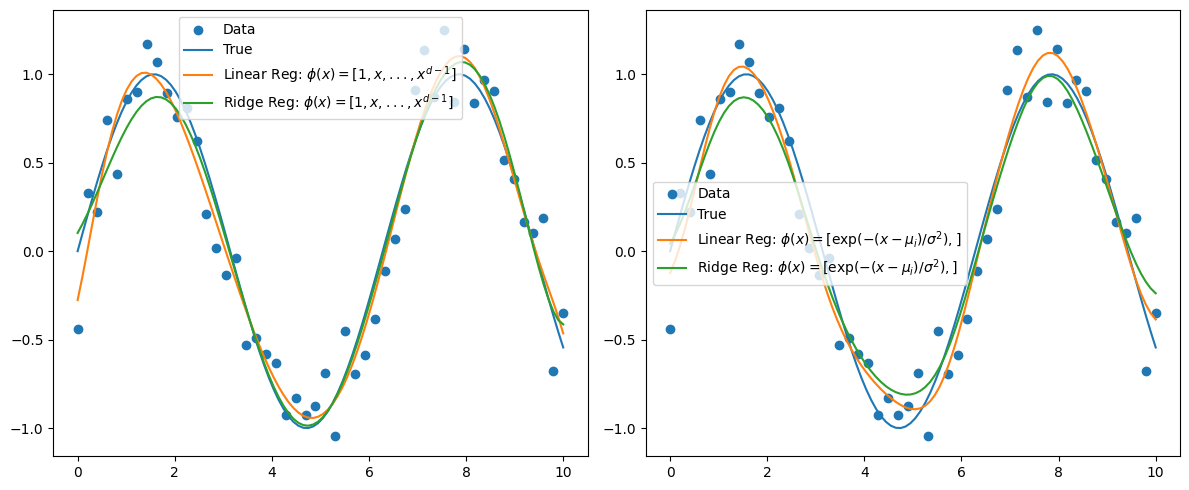

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

data_x = np.linspace(0, 10, 50)
data_y = np.sin(data_x)
test_x = np.linspace(0, 10, 100)
test_y = np.sin(test_x)
data_y = data_y + np.random.randn(*data_y.shape) * 0.2

d = 10
alpha = 1.0

# 多項式回帰
plt.subplot(1, 2, 1)
data_phi = np.vstack([data_x**i for i in range(d)])
test_phi = np.vstack([test_x**i for i in range(d)])

# 線形回帰
w = np.linalg.inv(data_phi @ data_phi.T) @ data_phi @ data_y
pred = w @ test_phi
plt.scatter(data_x, data_y, label="Data")
plt.plot(test_x, test_y, label="True")
plt.plot(test_x, pred, label=r"Linear Reg: $\phi(x) = [1, x, ..., x^{d-1}]$")

# # リッジ回帰
w = (np.linalg.inv(data_phi @ data_phi.T + alpha * np.eye(d, d))) @ data_phi @ data_y
pred = w @ test_phi
plt.plot(test_x, pred, label=r"Ridge Reg: $\phi(x) = [1, x, ..., x^{d-1}]$")
plt.legend()

# 動経基底関数回帰
sigma = 1
mu = np.linspace(0, 10, d)
plt.subplot(1, 2, 2)

# 線形回帰
data_phi = np.vstack([np.exp(-(data_x - mu[i])**2 / sigma**2) for i in range(d)])
test_phi = np.vstack([np.exp(-(test_x - mu[i])**2 / sigma**2) for i in range(d)])
w = np.linalg.inv(data_phi @ data_phi.T) @ data_phi @ data_y
pred = w @ test_phi
plt.scatter(data_x, data_y, label="Data")
plt.plot(test_x, test_y, label="True")
plt.plot(test_x, pred, label=r"Linear Reg: $\phi(x) = [\exp(-(x - \mu_i)/\sigma^2), ]$")

# リッジ回帰
w = (np.linalg.inv(data_phi @ data_phi.T + alpha * np.eye(d, d))) @ data_phi @ data_y
w = (np.linalg.inv(data_phi @ data_phi.T + alpha * np.eye(d, d))) @ data_phi @ data_y
pred = w @ test_phi
plt.plot(test_x, pred, label=r"Ridge Reg: $\phi(x) = [\exp(-(x - \mu_i)/\sigma^2), ]$")
plt.legend()

plt.tight_layout()

最尤推定やMAP推定では回帰パラメータ$w$の点推定をしていました。
ガウス過程回帰では$w$の計算を省略して、直接事後分布を求めることを考えます。

つまり、新しいデータ点$(x^*, y^*)$に対して、$p(y^*|\phi(x^*), Y, \Phi)$を直接求めます。
まずさっきと同様にしてデータの分布を$p(Y|\Phi, w)=\mathcal{N}(w^T\Phi, \lambda^{-1})$とします。
また、事前分布を$p(w) = \mathcal{N}(w | 0, \Lambda^{-1})$とします。

$w$について周辺化して$y^*$の事後分布を求めます。

$$
p(y^*|x^*, Y, X) = \int p(y^*|x^*, w)p(w|Y, X) dw = \mathcal{N}(y^*|\mu^*, \lambda_*^{-1})
$$

ここで、

$$
\mu^* = \lambda \phi(x^*)^T(\lambda \Phi\Phi^T + \Lambda)^{-1} \Phi Y
$$
$$
\lambda_*^{-1} = \lambda^{-1} + \phi(x^*)^T(\lambda \Phi\Phi^T + \Lambda)^{-1} \phi(x^*)
$$
です。

これは書き直すとカーネル関数のみで表すことができます。書くのがめんどくさいので詳細は以下に任せます。
* https://machine-learning.hatenablog.com/entry/2018/01/13/142612

In [2]:
import numpy as np
import matplotlib.pyplot as plt

d = 10
lam = 1.0
sigma = 0.1

def gauss_kernel(x, y, sigma=0.5):
    return np.exp(- 0.5 / sigma ** 2 * (x - y) @ (x - y))

def compute_mu_var(data_x, data_y, test_x):
    data_size = len(data_x)
    test_size = len(test_x)
    K = np.zeros(shape=(data_size, data_size))
    for i, j in np.ndindex(data_size, data_size):
        K[i, j] = gauss_kernel(data_x[i:i+1], data_x[j:j+1])

    K_inv = np.linalg.inv(K + lam * np.eye(data_size))

    K_x = np.zeros(shape=(test_size, data_size))
    for i, j in np.ndindex(test_size, data_size):
        K_x[i, j] = gauss_kernel(test_x[i:i+1], data_x[j:j+1])

    mu = K_x @ K_inv @ data_y
    assert mu.shape == (test_size,)

    K_star = np.zeros(shape=(test_size, test_size))
    for i, j in np.ndindex(test_size, test_size):
        K_star[i, j] = gauss_kernel(test_x[i:i+1], test_x[j:j+1])
    var = 1 / lam * np.eye(test_size) + K_star - (K_x @ K_inv @ K_x.T)

    return mu, var

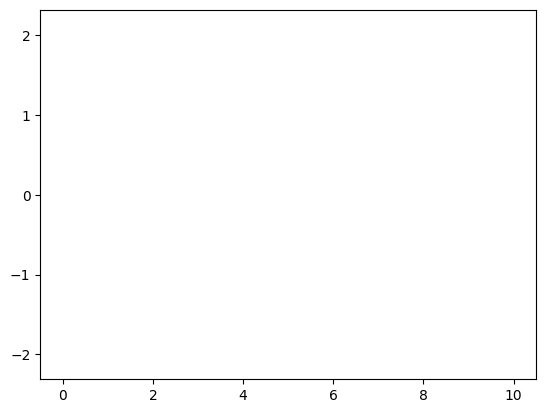

In [3]:
from scipy.stats import multivariate_normal
from IPython.display import HTML
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

for stop_x in range(10):
    data_x = np.arange(0, stop_x, 0.1)
    data_y = np.sin(data_x)
    test_x = np.linspace(0, 10, 100)

    mu, var = compute_mu_var(data_x, data_y, test_x)
    dist = multivariate_normal(mu, var)
    dist.rvs()

    l, h = mu - np.diag(var), mu + np.diag(var)
    plt.plot(test_x, mu)
    plt.fill_between(test_x, l, h, alpha=0.2)
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())